In [2]:
import pandas as pd

filename='./data/business_circle.xls'
data=pd.read_excel(filename,index_col=u'基站编号')
data=(data-data.min())/(data.max()-data.min())
data.to_excel('standardization.xls')
data

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_8062/3592936425.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel('standardization.xls')


,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,0.103865,0.856364,0.850539,0.169153
36903,0.263285,1.000000,0.725732,0.118210
36904,0.144928,0.740000,0.644068,0.038909
36905,0.082126,0.992727,0.993837,0.020031
36906,0.374396,0.867273,0.987673,0.102217
...,...,...,...,...
35562,0.125604,0.081818,0.291217,0.608771
38624,0.152174,0.072727,0.354391,0.590718
36017,0.205314,0.003636,0.129430,0.973539


In [4]:
import pandas as pd

filename='standardization.xls'
data=pd.read_excel(filename,index_col=u'基站编号')

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

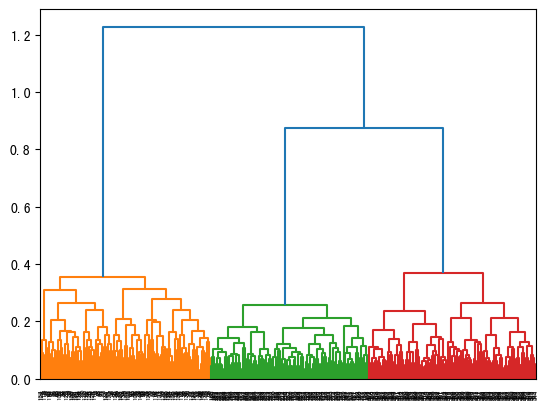

In [5]:
z=linkage(data,method='weighted',metric='euclidean')
p=dendrogram(z,0)
plt.show()

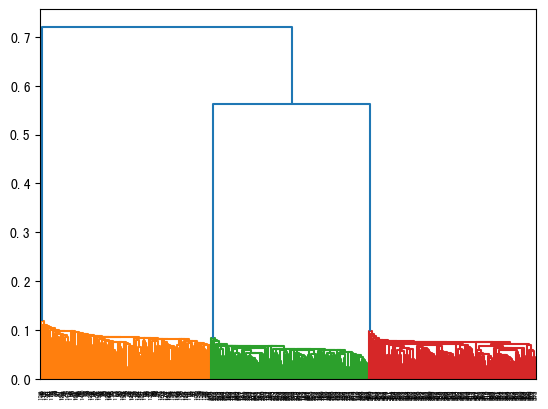

In [6]:
z=linkage(data,method='single',metric='euclidean')
p=dendrogram(z,0)
plt.show()

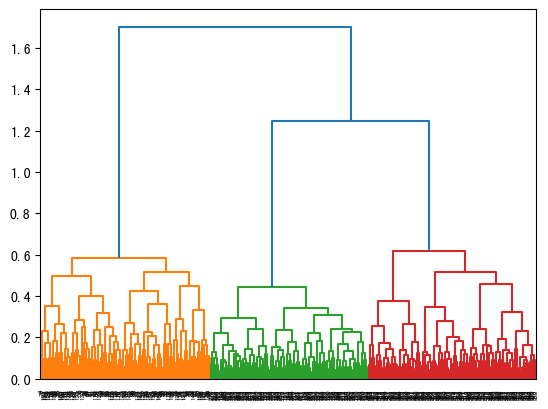

In [7]:
z=linkage(data,method='complete',metric='euclidean')
p=dendrogram(z,0)
plt.show()

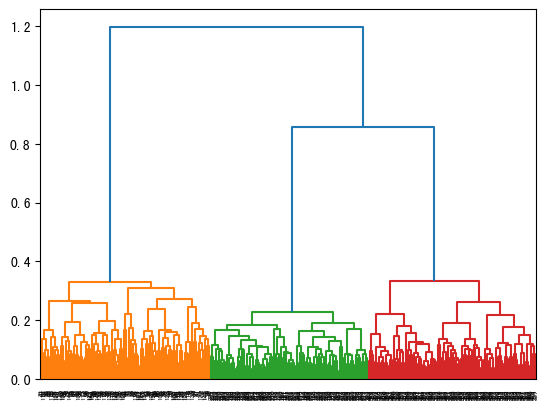

In [8]:
z=linkage(data,method='average',metric='euclidean')
p=dendrogram(z,0)
plt.show()

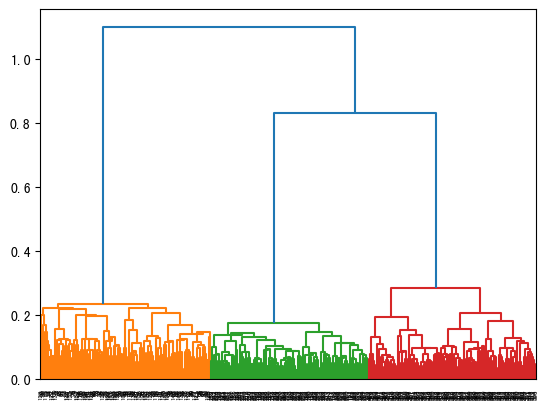

In [9]:
z=linkage(data,method='centroid',metric='euclidean')
p=dendrogram(z,0)
plt.show()

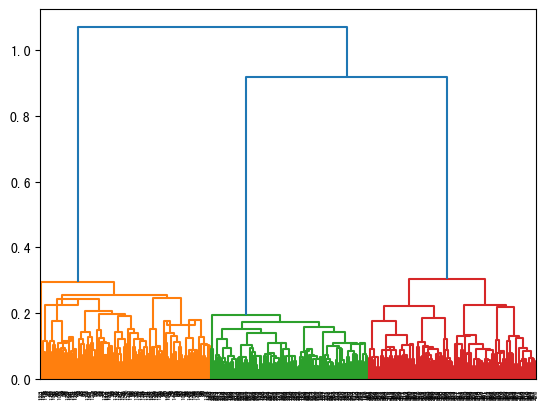

In [10]:
z=linkage(data,method='median',metric='euclidean')
p=dendrogram(z,0)
plt.show()

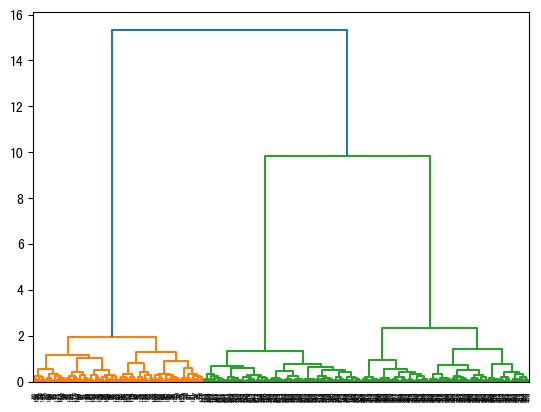

In [11]:
z=linkage(data,method='ward',metric='euclidean')
p=dendrogram(z,0)
plt.show()

In [14]:
import pandas as pd

filename='standardization.xls'
data=pd.read_excel(filename,index_col=u'基站编号')
k=3;

from sklearn.cluster import AgglomerativeClustering
model =AgglomerativeClustering(n_clusters=k,linkage='ward')

model.fit(data)

AgglomerativeClustering(n_clusters=3)

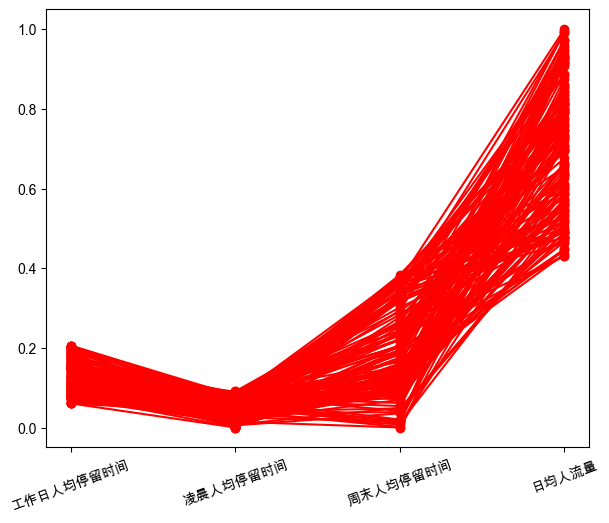

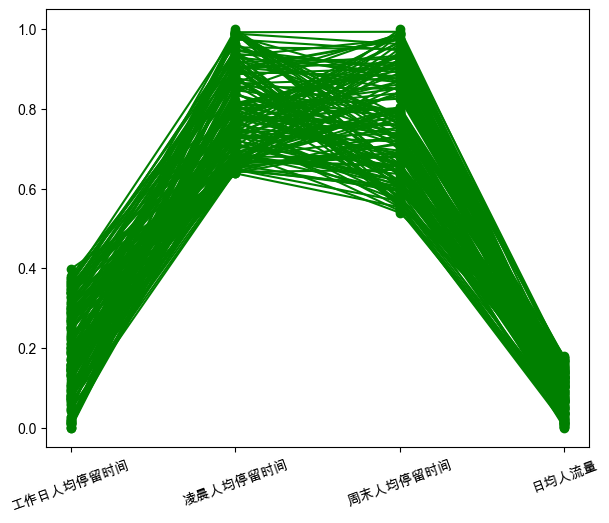

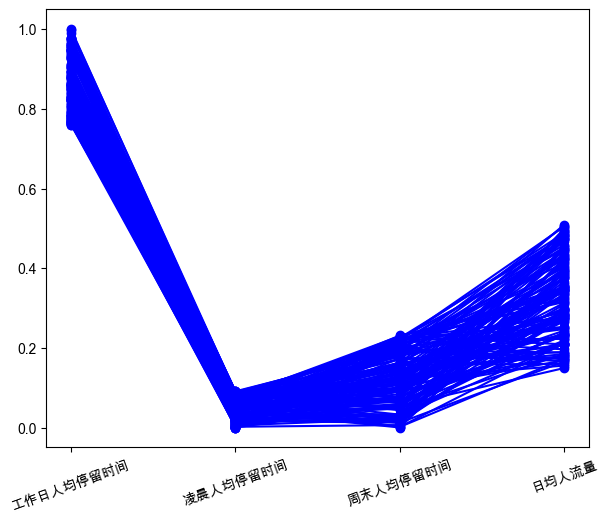

In [20]:
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+[u'聚类类别']

import matplotlib.pyplot as plt
from pylab import mpl
plt.rc('figure',figsize=(7,6))
mpl.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

style=['ro-','go-','bo-']
xlabels=[u'工作日人均停留时间',u'凌晨人均停留时间',u'周末人均停留时间',u'日均人流量']
pic_output='type_'

for i in range(k):
    plt.figure()
    tmp=r[r[u'聚类类别']==i].iloc[:,:4]
    for j in range(len(tmp)):
        plt.plot(range(1,5),tmp.iloc[j],style[i])
    
    plt.xticks(range(1,5),xlabels,rotation=20)
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(u'%s%s.png'%(pic_output,i))

